In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../bstadt/NeuroDataResource')
sys.path.append('../../bstadt/Util')
sys.path.append('../../bstadt/Quality')
sys.path.append('../../bstadt/Collman')

from CollmanAlg import CollmanAlg
from CollmanSVM import CollmanSVM
from NeuroDataResource import NeuroDataResource
from Quality import compute_overlap_array, get_unique_overlap
from graphing import graph_performance

In [2]:
with open('../data/api_key.txt', 'r') as f:
    api_key = f.readline()

In [3]:
channel_list = [{'name': 'PSD95_488', 'dtype':'uint8'},
                 {'name': 'GABA488', 'dtype':'uint8'},
                 {'name': 'gephyrin594', 'dtype':'uint8'},
                 {'name': 'GAD647', 'dtype':'uint8'},
                 {'name': 'Synapsin647', 'dtype':'uint8'},
                 {'name': 'GS594', 'dtype':'uint8'},
                 {'name': 'VGluT1_647', 'dtype':'uint8'},
                 {'name': 'annotation', 'dtype':'uint64'}]

resource = NeuroDataResource('api.boss.neurodata.io',
                               api_key,
                               'collman',
                               'collman15v2',
                               channel_list)

In [4]:
svm = CollmanSVM(resource, 3.)

## Overview
This notebook compares the performance of Collman Median Filter and Collman SVM model. The SVM model was trained in z_range=[1, 21], y_range=[1000, 2000], z_range=[1000, 2500]. Predictions were made in z_range=[1, 21], y_range=[2000, 3500], x_range=[2500, 4000].

In [5]:
svm.train_on_volume([1, 21], [1000, 2000], [1000, 2500])

In [32]:
z_range = [1, 21]
y_range = [2000, 3500]
x_range = [2500, 4000]

In [33]:
predictions_median = svm._medianFilter.detect(zRange=z_range, yRange=y_range, xRange=x_range)

In [34]:
predictions_svm = svm.predict_on_volume(zRange=z_range, yRange=y_range, xRange=x_range)

In [35]:
gt = resource.get_cutout('annotation', zRange=z_range, yRange=y_range, xRange=x_range)

In [37]:
overlaps_median = compute_overlap_array(predictions_median, gt)

In [39]:
overlaps_svm = compute_overlap_array(predictions_svm, gt)

graphing.py in source/j1c/quality can graph quantitative performance of multiple algorithms. 
* SVM shows increase in false negatives, but decrease in false positives. 
* Absolute number of corrects are still way too low for SVM.
* There may be an issue with compute_overlap_array method.

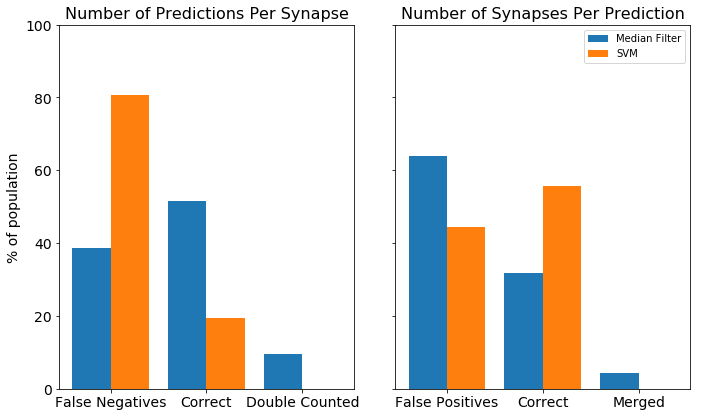

In [48]:
graph_performance([overlaps_median, overlaps_svm], labels=['Median Filter', 'SVM'])

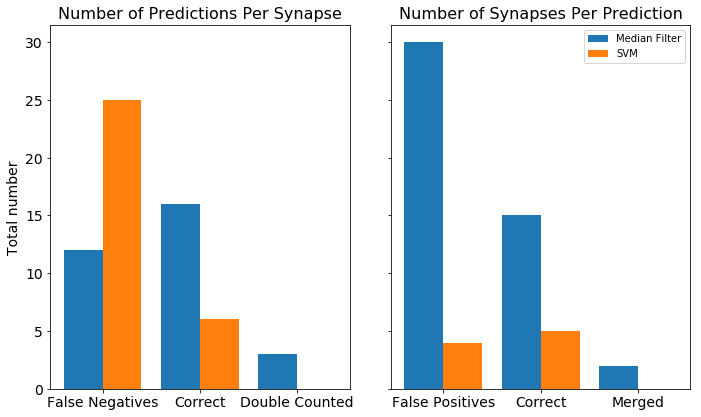

In [55]:
graph_performance([overlaps_median, overlaps_svm], labels=['Median Filter', 'SVM'], absolute=True)